In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx

import sklearn.model_selection as sklm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl
from sklearn.linear_model import Ridge


from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd 



# Project 1 A

Write own code for Ordinary Least Squares. Find the conﬁdence intervals of the parameters β by computing their variances, evaluate the Mean Squared error (MSE) and R2-score


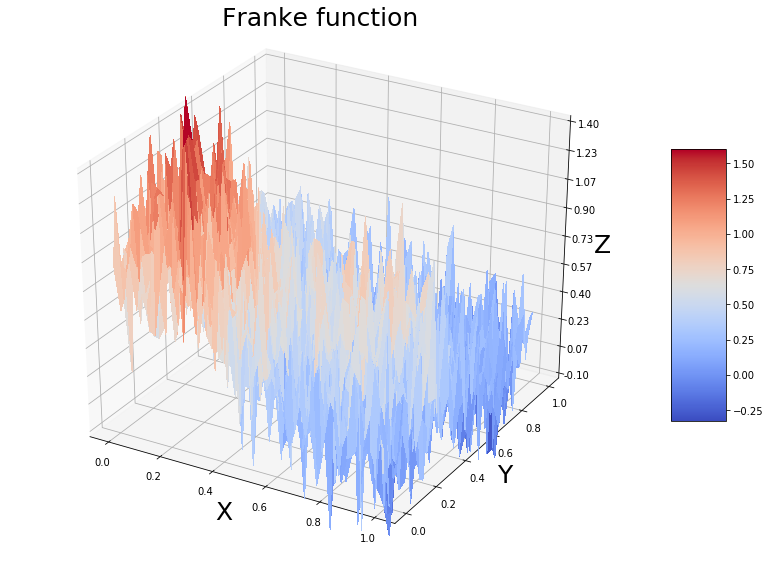

In [2]:
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')
n_x         = 50

# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.25
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)

# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('Franke function', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# for our computations, we reshape the Franke function to a 1D array
frank           = np.ravel(frank)


# OLS regression for polynomial degree 1-5

In [3]:
maxpower = 5

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols = {}
confidence_ols_est_sigma = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
mse_ols_scikit = np.empty([maxpower])
r2_ols_scikit  = np.empty([maxpower])

# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,frank,design) 
    #storing MSE and R2
    mse_ols[i]        = fx.MSE(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols_scikit[i]  = r2_score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    # Extracting the confidence interval
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95)
    confidence_ols_est_sigma ['conf{0}'.format(i+1)]= fx.confidence_interval_est_sigma(design,0.95,frank,pred_ols ['poly{0}'.format(i+1)])
    
    print((i+1)*100/maxpower, '% completed')
    

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


# Plotting MSE and R2-score 

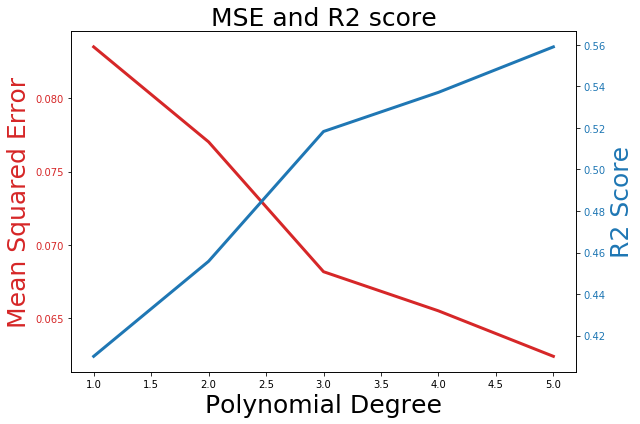

In [4]:



fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ols, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

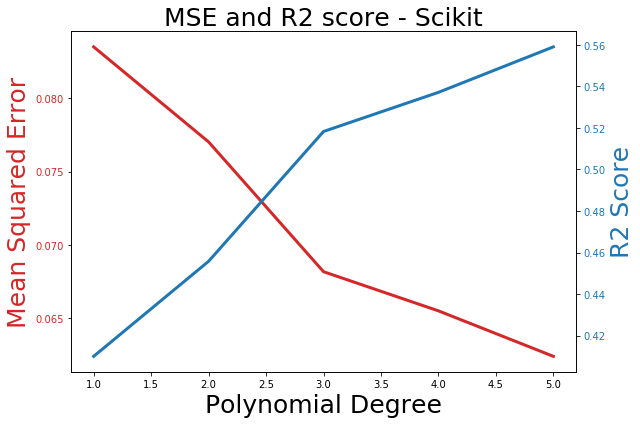

In [5]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ols_scikit, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols_scikit, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score - Scikit',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



# Plotting beta values with confidence interval for fith-order polynomial

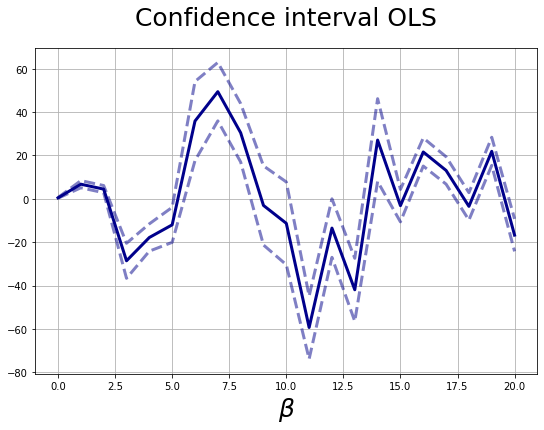

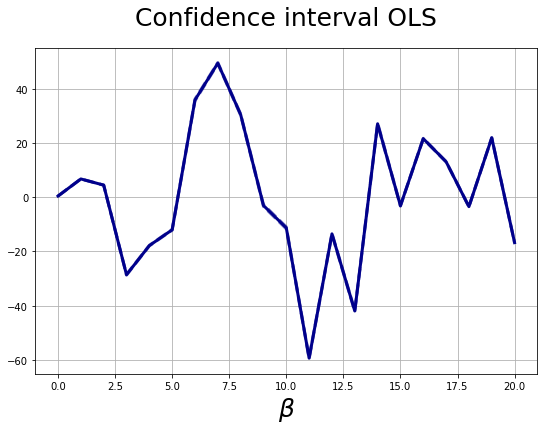

In [6]:

power = 5

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)], c='darkblue', linewidth=3)
plt.title('Confidence interval OLS', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()


power = 5

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ols['poly'+str(power)] - confidence_ols_est_sigma['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)] + confidence_ols_est_sigma['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)], c='darkblue', linewidth=3)
plt.title('Confidence interval OLS', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()



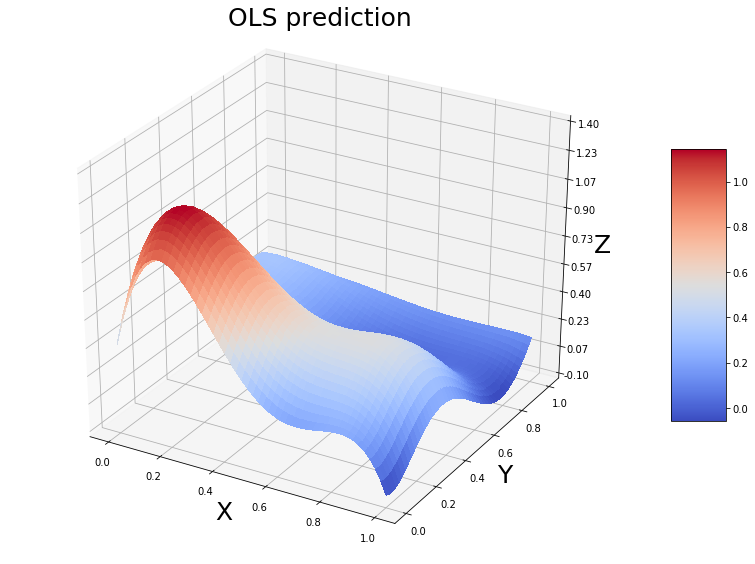

In [370]:
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')
ols_prediction=pred_ols['poly5'].reshape((n_x,n_x))

# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ols_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('OLS prediction', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Project 1 B
Split data in training and test data. Implement k-fold cross validation


In [371]:

# evaluting for fifth order polynomial.
design      = fx.DesignDesign(x,y,5)
design_train, design_test, y_train, y_test = train_test_split(design, frank, test_size=0.2)#splitting data 

# testing our OLS against scikit
beta , prediction = fx.OridinaryLeastSquares(design_train,y_train,design_test)
prediction_scikit = LinearRegression().fit(design_train, y_train).predict(design_test)


print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction_scikit)) 


print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction_scikit))

Test R2
0.5587206054644254
Test R2- Scikit Learn
0.5585432668655091
Test MSE
0.06484588618717026
Test MSE- Scikit Learn
0.06484588618736828


# K-fold Cross-Validation

In [372]:
maxpower = 40
r2_out_ols   = np.zeros(maxpower)
r2_in_ols    = np.zeros(maxpower)
mse_out_ols  = np.zeros(maxpower)
mse_in_ols   = np.zeros(maxpower)
#bias     = np.zeros(maxpower)
#variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
#bias_sci     = np.zeros(maxpower)
#variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out_ols[i], mse_out_ols[i], r2_in_ols[i], mse_in_ols[i] \
                    = fx.k_fold_cv(5, frank, design_matrix, fx.ols_svd, shuffle=True)
    #r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i] \
    #                = fx.k_fold_cv(7, frank, design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


2.5 % completed
5.0 % completed
7.5 % completed
10.0 % completed
12.5 % completed


KeyboardInterrupt: 

# Project 1 C

### Plotting in-sample (training) error and out-sample (test) error as a function of model complexity

In [ ]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_out_ols, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_ols, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_ols, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_ols,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.8),fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MSE and R2 score',fontsize=25)
plt.show()



In [ ]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_out_sci, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_sci, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_sci, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_sci,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.8),fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MSE and R2 score - scikit',fontsize=25)
plt.show()


# Bias-Variance trade-off

In [ ]:
#Bootstrap part and initializations 

import functions as fx
err = []
bi=[]
vari=[]

N = 100
degrees = np.arange(0,40)



for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    error,bias,variance = fx.N_bootstraps(frank,model,fx.ols_svd,N)
    err.append(error)
    bi.append(bias)
    vari.append(variance)



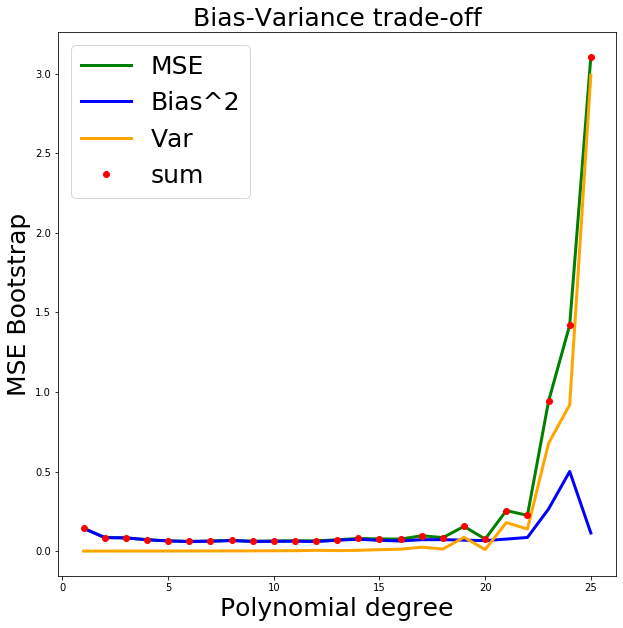

In [344]:

max_pd=25
degg=degrees[:max_pd]+1
plt.figure(figsize=(10,10))
plt.plot(degg,err[:max_pd],'green',label='MSE',linewidth=3)
plt.plot(degg,np.asarray(bi[:max_pd]),'b',label='Bias^2',linewidth=3)
plt.plot(degg,vari[:max_pd],'orange',label='Var',linewidth=3)
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degg,summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree', fontsize=25)
plt.ylabel('MSE Bootstrap', fontsize=25)
plt.title('Bias-Variance trade-off', fontsize=25)
plt.legend(fontsize=25)
plt.show()

# Oppgave D - Ridge Regression

In [7]:
maxpower=5

# preallocating variables
beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([maxpower])
r2_ridge         = np.empty([maxpower])
mse_ridge_scikit = np.empty([maxpower])
r2_ridge_scikit  = np.empty([maxpower])



# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)
    design      = design
    beta_ridge ['poly{0}'.format(i+1)], pred_ridge ['poly{0}'.format(i+1)]\
                = fx.RidgeRegression(design,frank,design, _lambda= 10e-04) 

    mse_ridge[i]        = fx.MSE(frank,pred_ridge['poly'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(frank,pred_ridge['poly'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(frank,pred_ridge['poly'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(frank,pred_ridge['poly'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/maxpower, '% completed')

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


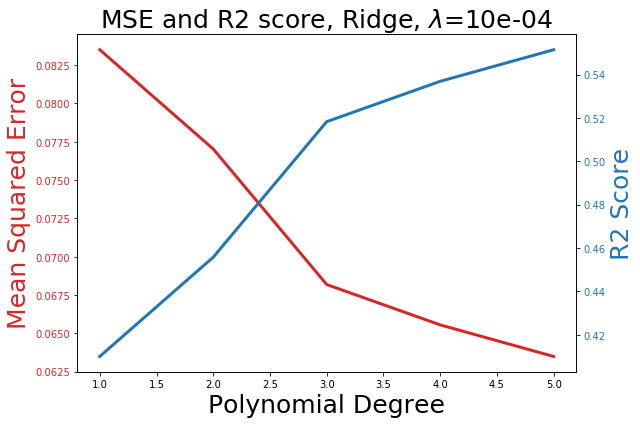

In [8]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ridge, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ridge, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge, $\lambda$=10e-04',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



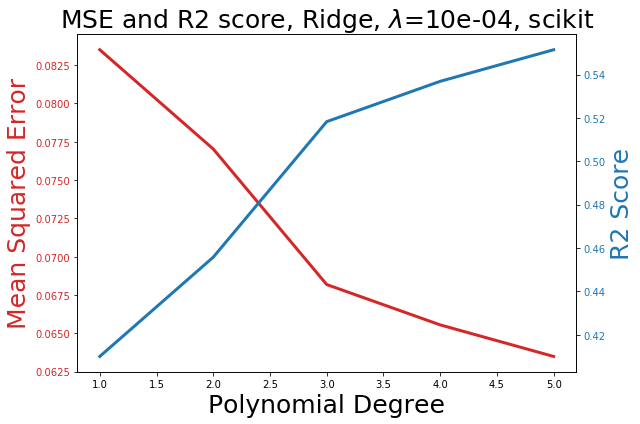

In [9]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ridge_scikit, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ridge_scikit, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge, $\lambda$=10e-04, scikit',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





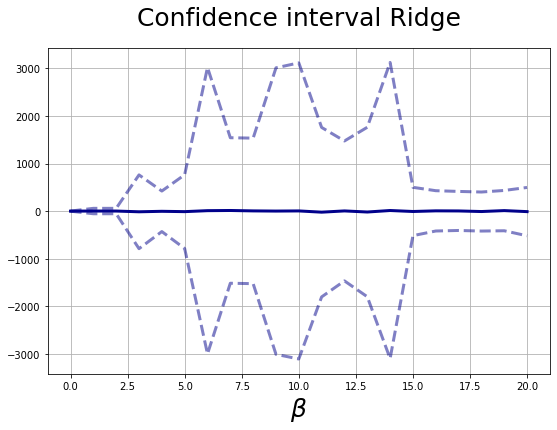

In [10]:



power = 5

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ridge['poly'+str(power)] - confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ridge['poly'+str(power)] + confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ridge['poly'+str(power)], c='darkblue',linewidth=3)
plt.title('Confidence interval Ridge', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()


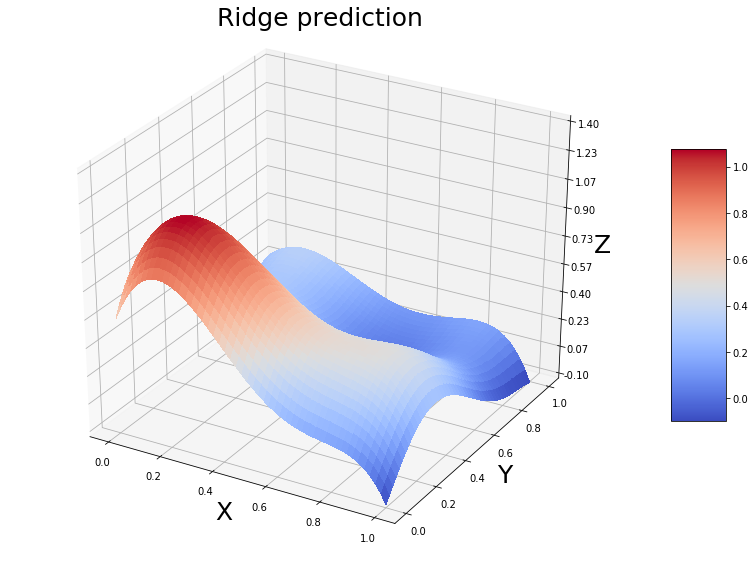

In [267]:
ridge_prediction = pred_ridge['poly5'].reshape((n_x,n_x))

fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ridge_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('Ridge prediction', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [268]:
power=5
lambdas=np.logspace(-4,2,7)





beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([lambdas.shape[0]])
r2_ridge         = np.empty([lambdas.shape[0]])
mse_ridge_scikit = np.empty([lambdas.shape[0]])
r2_ridge_scikit  = np.empty([lambdas.shape[0]])


# Running loop over model complexity (polynomial degree) 
for i in range(lambdas.shape[0]):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,power)  
    #design      = design[:,1:]

    beta_ridge ['lamb{0}'.format(i+1)], pred_ridge ['lamb{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(frank),design, _lambda= lambdas[i]) 
    
    mse_ridge[i]        = fx.MSE(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/lambdas.shape[0], '% completed')
    

14.285714285714286 % completed
28.571428571428573 % completed
42.857142857142854 % completed
57.142857142857146 % completed
71.42857142857143 % completed
85.71428571428571 % completed
100.0 % completed


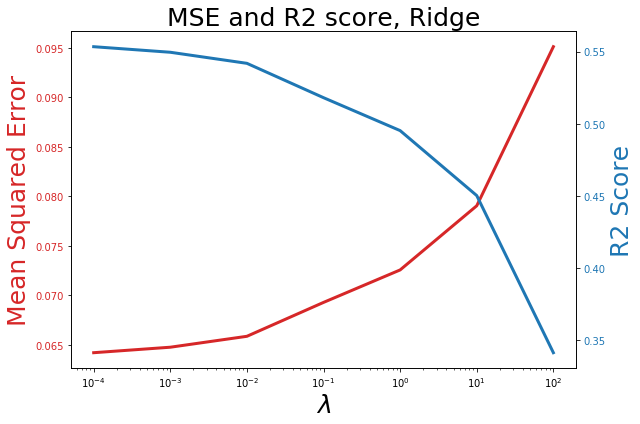

In [269]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('$\lambda$',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(lambdas, mse_ridge, color=color,linewidth=3)
plt.xscale('log')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(lambdas, r2_ridge, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge',fontsize=25)
plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





In [270]:
design      = fx.DesignDesign(x,y,5)  
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta, prediction = fx.RidgeRegression(design_train, y_train, design_test, _lambda=10e-04)

prediction_scikit= Ridge(alpha=10e-04).fit(design_train, y_train).predict(design_test)


print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction_scikit)) 

# Tester med Scikit Learn



print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction_scikit))

Test R2
0.5160301797947104
Test R2- Scikit Learn
0.5159869558662296
Test MSE
0.06604645968355076
Test MSE- Scikit Learn
0.06604636931453375


In [271]:
maxpower = 5
lambdas=np.logspace(-4,2,7)

r2_out_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_ridge = np.zeros([maxpower,lambdas.shape[0]])

r2_out_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_sci_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_sci_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_sci_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_sci_ridge = np.zeros([maxpower,lambdas.shape[0]])
tmp=0
for i in range(maxpower):
    for j in range(lambdas.shape[0]):
        
        design_matrix   = fx.DesignDesign(x,y,i+1)
        #design_matrix   = design_matrix[:,1:]

        r2_out_ridge[i,j], mse_out_ridge[i,j], r2_in_ridge[i,j], mse_in_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True)
        r2_out_sci_ridge[i,j], mse_out_sci_ridge[i,j], r2_in_sci_ridge[i,j], mse_in_sci_ridge[i,j], \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True, scikit=True)
        tmp=tmp+1
        print((tmp)*100/(maxpower*lambdas.shape[0]), '% completed')


2.857142857142857 % completed
5.714285714285714 % completed
8.571428571428571 % completed
11.428571428571429 % completed
14.285714285714286 % completed
17.142857142857142 % completed
20.0 % completed
22.857142857142858 % completed
25.714285714285715 % completed
28.571428571428573 % completed
31.428571428571427 % completed
34.285714285714285 % completed
37.142857142857146 % completed
40.0 % completed
42.857142857142854 % completed
45.714285714285715 % completed
48.57142857142857 % completed
51.42857142857143 % completed
54.285714285714285 % completed
57.142857142857146 % completed
60.0 % completed
62.857142857142854 % completed
65.71428571428571 % completed
68.57142857142857 % completed
71.42857142857143 % completed
74.28571428571429 % completed
77.14285714285714 % completed
80.0 % completed
82.85714285714286 % completed
85.71428571428571 % completed
88.57142857142857 % completed
91.42857142857143 % completed
94.28571428571429 % completed
97.14285714285714 % completed
100.0 % completed


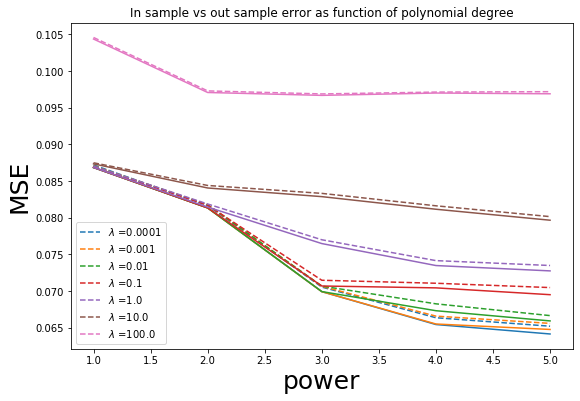

In [272]:
fig, ax = plt.subplots(figsize=(9,6))

for i in range(np.shape(lambdas)[0]):
    pl=ax.plot(range(1,maxpower+1),mse_out_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]),linestyle='--')
    col=pl[0].get_color()
    ax.plot(range(1,maxpower+1),mse_in_ridge[:,i], color=col)
    
plt.legend()
plt.xlabel('power', fontsize=25)
plt.ylabel('MSE', fontsize=25)
plt.title('In sample vs out sample error as function of polynomial degree')
plt.show()

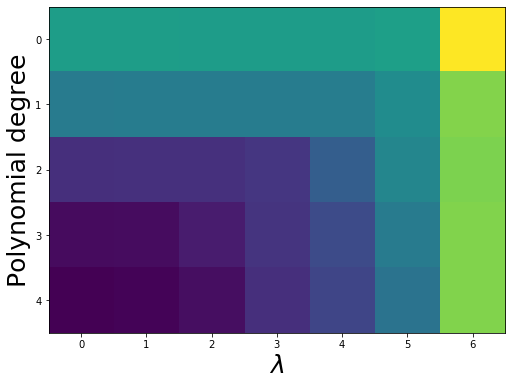

In [273]:

fig , ax = plt.subplots(figsize=(9,6))
ax.imshow(mse_out_ridge)
ax.set_ylabel('Polynomial degree', fontsize=25)
ax.set_xlabel('$\lambda$', fontsize=25)
plt.show()

In [274]:
# Bootstrapping to evaluate bias variance trade-off
N = 1000
degrees = np.arange(0,12)
lambdas=np.logspace(-4,2,7)

err=np.empty([len(degrees),len(lambdas)])
bi=np.empty([len(degrees),len(lambdas)])
vari=np.empty([len(degrees),len(lambdas)])

for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    #model   = model[:,1:]

    for lamb in range(len(lambdas)):
        error,bias,variance = fx.N_bootstraps(frank,model,fx.RidgeRegression,N, _lambda=lambdas[lamb])
        err[degree,lamb]=error
        bi[degree,lamb]=bias
        vari[degree,lamb]=variance


0
1
2
3
4
5
6
7
8
9
10
11


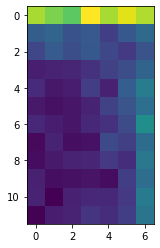

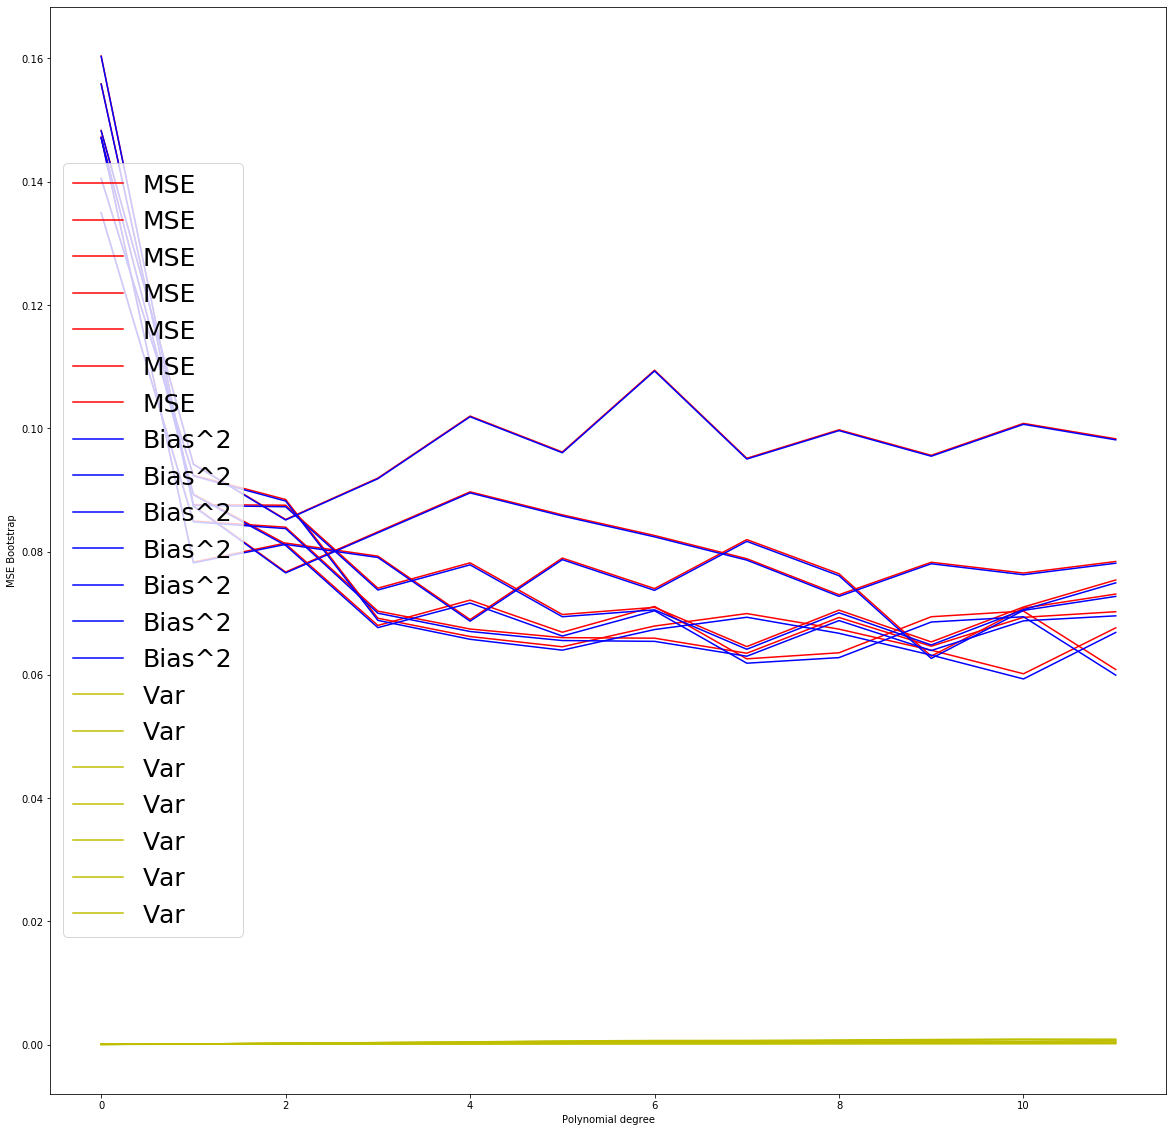

In [275]:

plt.imshow(bi)
plt.show()


max_pd=15
plt.figure(figsize=(20,20))
plt.plot(degrees[:max_pd],err[:max_pd],'red',label='MSE')
plt.plot(degrees[:max_pd],np.asarray(bi[:max_pd]),'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
#for i in range(len(err)):
#    summ[i]=vari[i]+bi[i]
#plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend(fontsize=25)
plt.show()

# Oppgave E - LASSO

MSE
0.06640741956234195
R2
0.5336779452820339
intercept
0.9950044315756122
intercept_frank
0.8539149780063604


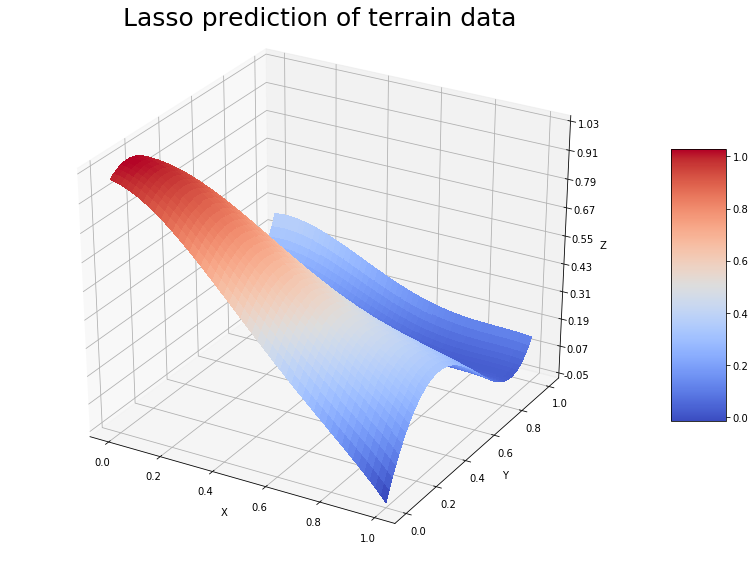

In [161]:
# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[n_x,n_x]
x_lasso = np.ravel(x_mesh)
y_lasso = np.ravel(y_mesh)
z_lasso = frank

lasso_multi = np.c_[x_lasso, y_lasso]

# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
#poly2 = PolynomialFeatures(degree=5)

# Transformerer variabelmatrisen 
#Lasso_sklearn = poly2.fit_transform(lasso_multi)

Lasso_sklearn=fx.DesignDesign(x,y,5)

# Beregner Lasso modell 
lasso = linear_model.Lasso(alpha=1e-04, max_iter=10e5)
fit_lasso = lasso.fit(Lasso_sklearn[:,1:], z_lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn[:,1:])


# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(shape) # for å få den i samme dimensjon som x og y. 


print("MSE")
print(fx.MSE(frank,np.ravel(predict_mesh_Lasso)))
print("R2")
print(fx.R2Score(frank,np.ravel(predict_mesh_Lasso)))
print('intercept')
print(fit_lasso.intercept_)
print('intercept_frank')
print(frank[0])
    


########################### Surface Plot #############################
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d') 
surf        = ax.plot_surface(x_mesh, y_mesh, predict_mesh_Lasso, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
#ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Lasso prediction of terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



1
2
3
4
5


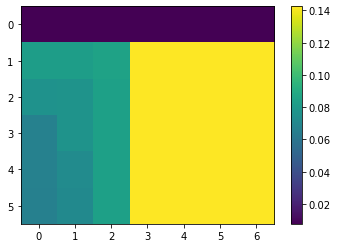

In [162]:
# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[n_x,n_x]
x_lasso = np.ravel(x_mesh)
y_lasso = np.ravel(y_mesh)
z_lasso = frank



lasso_multi = np.c_[x_lasso, y_lasso]
powers=np.arange(1,6)
lambdas=np.logspace(-4,2,7)
mse_lasso   = np.empty([len(powers)+1,len(lambdas)])
r2_lasso    = np.empty([len(powers)+1,len(lambdas)])

for power in powers:
    #poly2 = PolynomialFeatures(degree=power)
    #Lasso_sklearn = poly2.fit_transform(lasso_multi)
    Lasso_sklearn=fx.DesignDesign(x,y,power)
    print(power)
    for lamb in range(len(lambdas)): 
        lasso = linear_model.Lasso(alpha=lambdas[lamb], fit_intercept=True, max_iter=10e4)
        fit_lasso = lasso.fit(Lasso_sklearn[:,1:], z_lasso) 
        predictLasso = lasso.predict(Lasso_sklearn[:,1:])
        
        mse_lasso[power,lamb]=fx.MSE(z_lasso,predictLasso)
        r2_lasso[power,lamb]=fx.R2Score(z_lasso,predictLasso)
        

plt.imshow(mse_lasso)
plt.colorbar()
plt.show()

In [163]:
import numpy as np
from sklearn.model_selection import KFold
k=5
X=np.c_[x_lasso, y_lasso]
kf = KFold(n_splits=5,shuffle=True,random_state=5)

maxpower = 5
lambdas=np.logspace(-4,2,7)

mse_lasso_in=np.empty([maxpower, len(lambdas)])
mse_lasso_out=np.empty([maxpower, len(lambdas)])


r2_lasso_in=np.empty([maxpower, len(lambdas)])
r2_lasso_out=np.empty([maxpower, len(lambdas)])




for power in range(maxpower):
    print(power+1)
    
    for lamb in range(len(lambdas)): 
        errin=0
        errout=0
        r2in=0
        r2out=0
        for train, test in kf.split(X):
            x_train = np.ravel(x_mesh)[train]
            y_train = np.ravel(y_mesh)[train]
            x_test = np.ravel(x_mesh)[test]
            y_test = np.ravel(y_mesh)[test]
            
            z_train = frank[train] 
            z_test = frank[test]
            
            Lasso_train=fx.DesignDesign(x_train,y_train,power+1, ravel=True)
            Lasso_test=fx.DesignDesign(x_test,y_test,power+1, ravel=True)
            
            
            lasso = linear_model.Lasso(alpha=lambdas[lamb], max_iter=10e5)
            fit_lasso = lasso.fit(Lasso_train[:,1:], z_train)
            
            predictLasso = lasso.predict(Lasso_test[:,1:])
            predictLasso_train = lasso.predict(Lasso_train[:,1:])
            
            errin += fx.MSE(z_train, predictLasso_train)
            errout += fx.MSE(z_test, predictLasso)
            r2in += fx.R2Score(z_train,predictLasso_train)
            r2out += fx.R2Score(z_test, predictLasso)
            
        mse_lasso_in[power,lamb] = errin/k
        mse_lasso_out[power,lamb] = errout/k
        r2_lasso_in[power,lamb] = r2in/k
        r2_lasso_out[power,lamb] = r2out/k
        
        
        

1
2
3
4
5


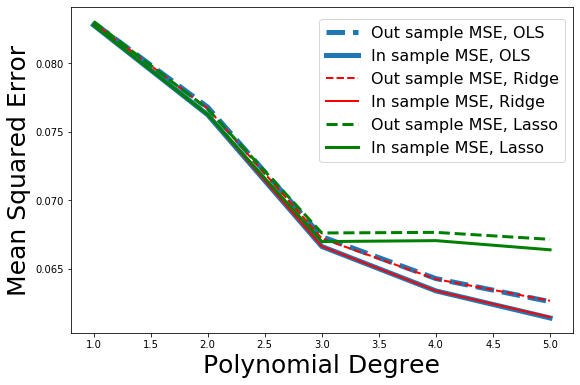

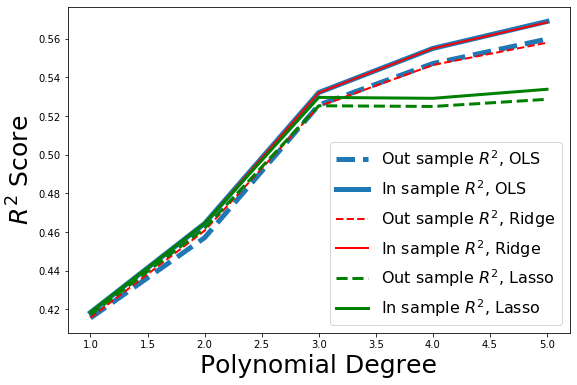

In [165]:
fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25)
p1=ax1.plot(range(1,maxpower+1), mse_out_ols,linestyle='--', label='Out sample MSE, OLS',linewidth=5)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_in_ols, color=col, label='In sample MSE, OLS',linewidth=5)
p1=ax1.plot(range(1,maxpower+1), mse_out_ridge[:,0], color='red',linestyle='--', label='Out sample MSE, Ridge',linewidth=2)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_in_ridge[:,0], color=col, label='In sample MSE, Ridge',linewidth=2)
p1=ax1.plot(range(1,maxpower+1), mse_lasso_out[:,0], color='green',linestyle='--', label='Out sample MSE, Lasso',linewidth=3)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_lasso_in[:,0], color=col, label='In sample MSE, Lasso',linewidth=3)

ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.5),fontsize=16)
ax1.tick_params(axis='y')
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

fig, ax2 = plt.subplots(figsize=(9,6))
ax2.set_xlabel('Polynomial Degree',fontsize=25)
p1=ax2.plot(range(1,maxpower+1), r2_out_ols,linestyle='--', label='Out sample $R^2$, OLS',linewidth=5)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_in_ols, color=col, label='In sample $R^2$, OLS',linewidth=5)
p1=ax2.plot(range(1,maxpower+1), r2_out_ridge[:,0], color='red',linestyle='--', label='Out sample $R^2$, Ridge',linewidth=2)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_in_ridge[:,0], color=col, label='In sample $R^2$, Ridge',linewidth=2)
p1=ax2.plot(range(1,maxpower+1), r2_lasso_out[:,0], color='green',linestyle='--', label='Out sample $R^2$, Lasso',linewidth=3)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_lasso_in[:,0], color=col, label='In sample $R^2$, Lasso',linewidth=3)


ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.0),fontsize=16)
ax2.tick_params(axis='y')
ax2.set_ylabel('$R^2$ Score',fontsize=25)  # we already handled the x-label with ax1
plt.show()

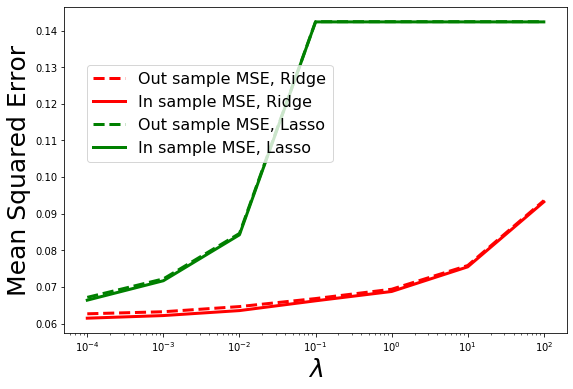

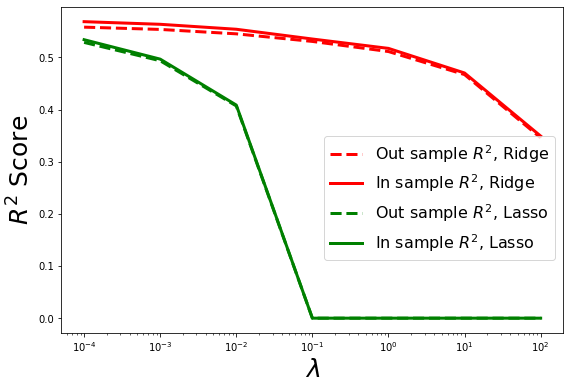

In [166]:
fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('$\lambda$',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25)
#p1=ax1.plot(lambdas, mse_out_ols,linestyle='--', label='Out sample MSE, OLS')
#col=p1[0].get_color()
#ax1.plot(lambdas, mse_in_ols, color=col, label='In sample MSE, OLS')
p1=ax1.plot(lambdas, mse_out_ridge[4,:], color='red',linestyle='--', label='Out sample MSE, Ridge',linewidth=3)
col=p1[0].get_color()
ax1.plot(lambdas, mse_in_ridge[4,:], color=col, label='In sample MSE, Ridge',linewidth=3)
p1=ax1.plot(lambdas, mse_lasso_out[4,:], color='green',linestyle='--', label='Out sample MSE, Lasso',linewidth=3)
col=p1[0].get_color()
ax1.plot(lambdas, mse_lasso_in[4,:], color=col, label='In sample MSE, Lasso',linewidth=3)
plt.xscale('log')
ax1.legend(loc='lower right', bbox_to_anchor=(0.55, 0.5),fontsize=16)
ax1.tick_params(axis='y')
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

fig, ax2 = plt.subplots(figsize=(9,6))
ax2.set_xlabel('$\lambda$',fontsize=25)
#p1=ax2.plot(lambdas, r2_out_ols,linestyle='--', label='Out sample $R^2$, OLS')
#col=p1[0].get_color()
#ax2.plot(lambdas, r2_in_ols, color=col, label='In sample $R^2$, OLS')
p1=ax2.plot(lambdas, r2_out_ridge[4,:], color='red',linestyle='--', label='Out sample $R^2$, Ridge',linewidth=3)
col=p1[0].get_color()
ax2.plot(lambdas, r2_in_ridge[4,:], color=col, label='In sample $R^2$, Ridge',linewidth=3)
p1=ax2.plot(lambdas, r2_lasso_out[4,:], color='green',linestyle='--', label='Out sample $R^2$, Lasso',linewidth=3)
col=p1[0].get_color()
plt.xscale('log')
ax2.plot(lambdas, r2_lasso_in[4,:], color=col, label='In sample $R^2$, Lasso',linewidth=3)


ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax2.tick_params(axis='y')
ax2.set_ylabel('$R^2$ Score',fontsize=25)  # we already handled the x-label with ax1
plt.show()

# Terrain data

In [20]:


terrain_data = imread('SRTM_data_Norway_1.tif')
[n,m] = terrain_data.shape



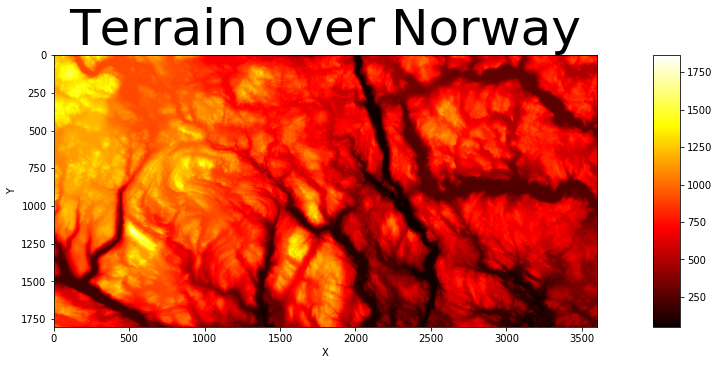

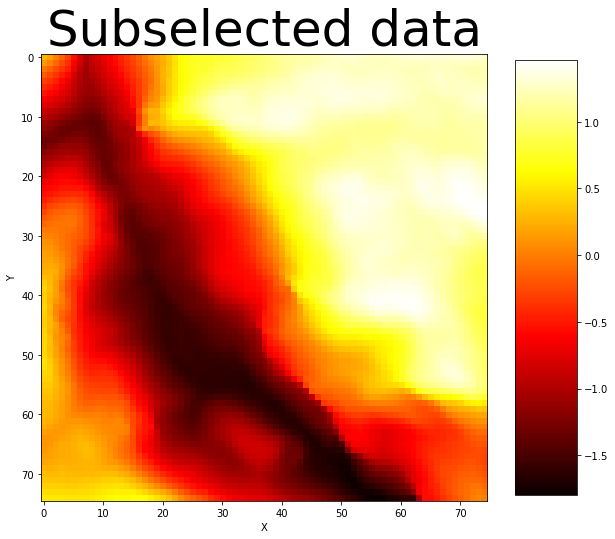

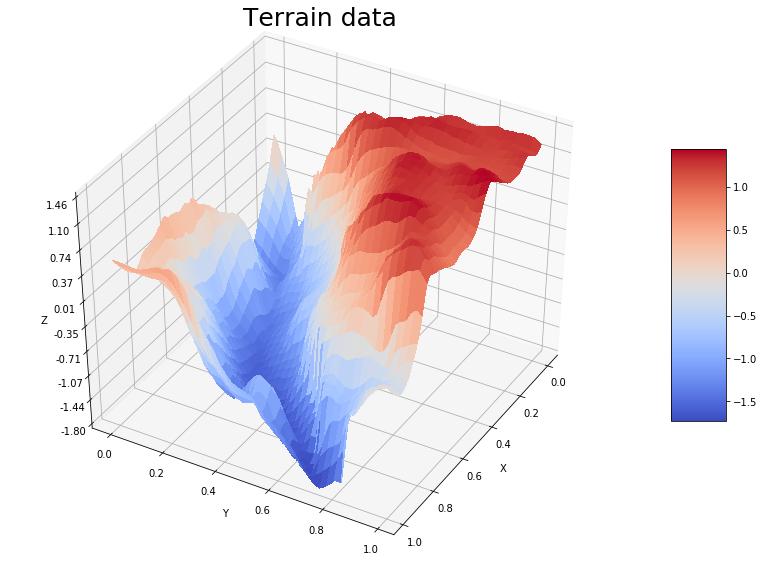

In [21]:
########################### Plotting Terrain data #############################
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Terrain over Norway', fontsize=50)
figure = plt.imshow(terrain_data.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
fig.colorbar(figure, shrink=1, aspect=10)
plt.show()

# subselecting the data, normalizing, creating x and y
#terrain_n = terrain_data[250:500,1000:1250]
terrain_n = terrain_data[1400:1475,750:825]
#terrain_n = terrain_data[1400:1445,750:795]

terrain_norm = (terrain_n-np.mean(terrain_n))/np.std(terrain_n) #normalizing data 
terrain=terrain_norm
nx,ny = terrain.shape
x=np.arange(terrain.shape[0])/terrain.shape[0]
y=np.arange(terrain.shape[1])/terrain.shape[1]
x_mesh, y_mesh  = np.meshgrid(x,y) #meshing data for plotting surface


########################### Plotting subselected data #############################
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Subselected data', fontsize=50)
figure=plt.imshow(terrain_norm.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
fig.colorbar(figure, shrink=0.8, aspect=7)
plt.show()




########################### Surface Plot #############################
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d') 
surf        = ax.plot_surface(x_mesh, y_mesh, terrain, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
#ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=40., azim=30)
plt.title('Terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


Mean Squared Error 0.017592865114225666
r2score 0.9824071350457653


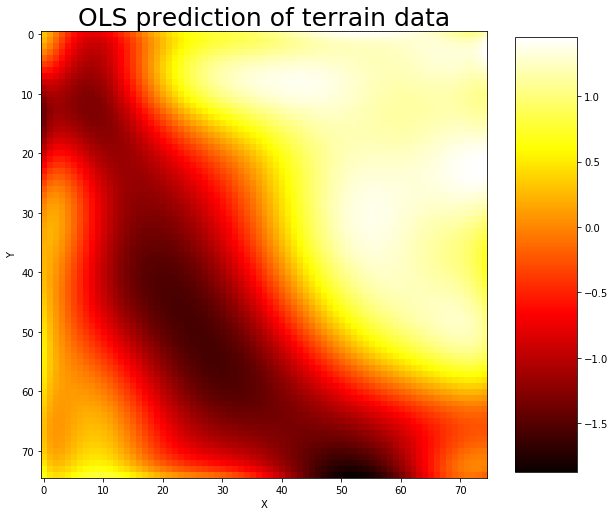

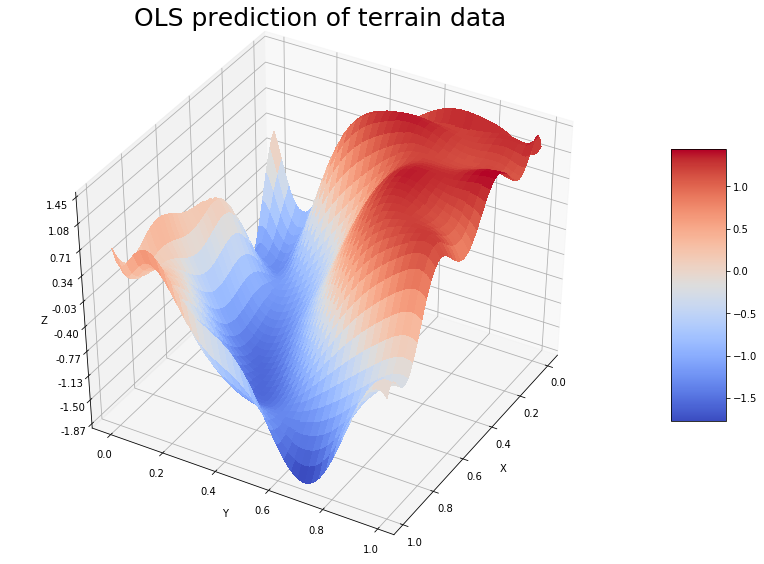

In [13]:
# OLS regression
design_matrix = fx.DesignDesign(x,y,10)
beta,pred=fx.OridinaryLeastSquares(design_matrix,np.ravel(terrain), design_matrix)#extracting beta and predicting
prediction_ols=pred.reshape(nx,ny)#reshaping the predicted terrain for plotting

#OLS prediction SVD (cannot use this due to memory issues)
#beta_svd,pred_svd=fx.ols_svd(design_matrix,np.ravel(terrain), design_matrix)#extracting beta and predicting
#prediction_ols=pred_svd.reshape(nx,ny)#reshaping the predicted terrain for plotting

#printing error metrics
print('Mean Squared Error', fx.MSE(terrain,prediction_ols))
print('r2score', fx.R2Score(terrain,prediction_ols))



########################### Plotting subselected data #############################
fig, ax = plt.subplots(figsize=(10,10))
plt.title('OLS prediction of terrain data', fontsize=25)
figure=plt.imshow(prediction_ols.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
fig.colorbar(figure, shrink=0.8, aspect=7)
plt.show()



########################### Surface Plot #############################
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d') 
surf        = ax.plot_surface(x_mesh, y_mesh, prediction_ols, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
#ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=40., azim=30)
plt.title('OLS prediction of terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [14]:
# Evaluating the prediction, error and confidence interval as a function of polynomial degree
maxpower = 10

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols_est_sigma = {}
confidence_ols = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
#mse_ols_scikit = np.empty([maxpower])
#r2_ols_scikit  = np.empty([maxpower])

for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,np.ravel(terrain),design) 
    
    mse_ols[i]        = fx.MSE(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    #mse_ols_scikit[i] = mean_squared_error(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    #r2_ols_scikit[i]  = r2_score(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    
    confidence_ols_est_sigma ['conf{0}'.format(i+1)]= fx.confidence_interval_est_sigma(design,0.95,np.ravel(terrain),pred_ols ['poly{0}'.format(i+1)])
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,1,0.95)#setting noise level to 1
    print((i+1)*100/maxpower, '% completed')
    

10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed


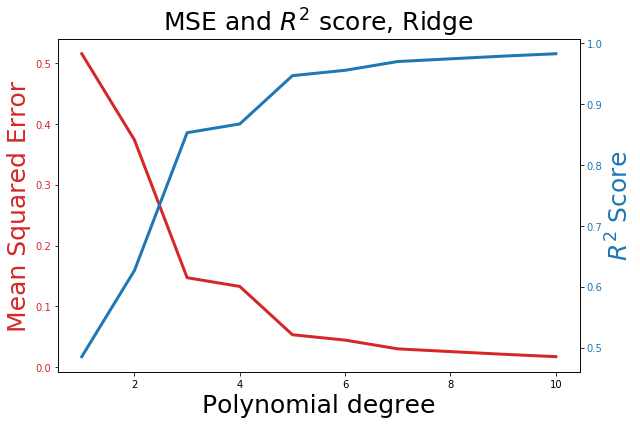

In [15]:
# plotting the Mean Squared Error and R^2 score as a function of polynomial degree.
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ols, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R^2$ Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and $R^2$ score, Ridge',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



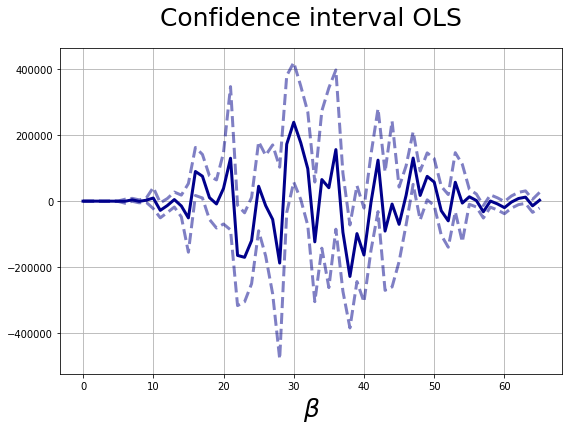

In [28]:



power = 10

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ols['poly'+str(power)], c='darkblue', linewidth=3)
plt.title('Confidence interval OLS', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()




In [17]:
maxpower = 10
r2_out_ols   = np.zeros(maxpower)
r2_in_ols    = np.zeros(maxpower)
mse_out_ols  = np.zeros(maxpower)
mse_in_ols   = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out_ols[i], mse_out_ols[i], r2_in_ols[i], mse_in_ols[i] \
                    = fx.k_fold_cv(5, np.ravel(terrain), design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    
     
    print((i+1)*100/maxpower, '% completed')

10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed


mse_ols 0.01808625538045532
r2_ols 0.9818994977325373


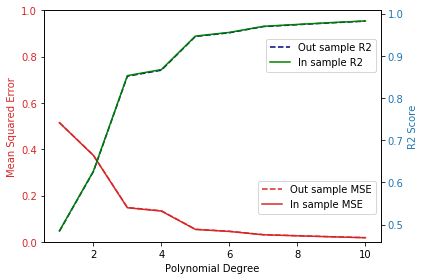

In [18]:
print('mse_ols', mse_out_ols[9] )
print('r2_ols', r2_out_ols[9] )




fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out_ols, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_ols, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.00,1) 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_ols, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_ols,  c='green', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.64, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




In [356]:

err = []
bi=[]
vari=[]

N = 200
degrees = np.arange(0,25)



for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    error,bias,variance = fx.N_bootstraps(np.ravel(terrain),model,fx.ols_svd,N)
    #error,bias,variance = fx.N_bootstraps(np.ravel(terrain),model,fx.OridinaryLeastSquares,N)
    err.append(error)
    bi.append(bias)
    vari.append(variance)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


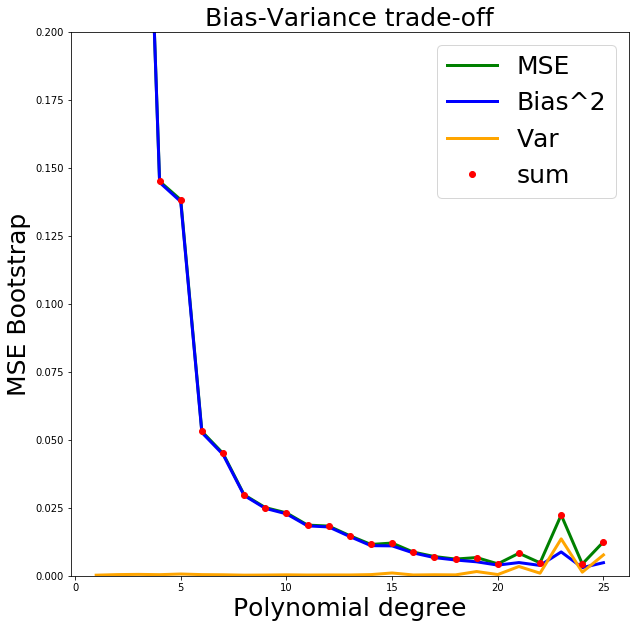

In [363]:

max_pd=25
degg=degrees[:max_pd]+1
plt.figure(figsize=(10,10))
plt.plot(degg,err[:max_pd],'green',label='MSE',linewidth=3)
plt.plot(degg,np.asarray(bi[:max_pd]),'b',label='Bias^2',linewidth=3)
plt.plot(degg,vari[:max_pd],'orange',label='Var',linewidth=3)
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degg,summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree', fontsize=25)
plt.ylabel('MSE Bootstrap', fontsize=25)
plt.title('Bias-Variance trade-off', fontsize=25)
#plt.set_ylim(0,0.2)
plt.ylim(0, 0.2) 

plt.legend(fontsize=25)
plt.show()

In [23]:
maxpower=10

# preallocating variables
beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([maxpower])
r2_ridge         = np.empty([maxpower])



# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ridge ['poly{0}'.format(i+1)], pred_ridge ['poly{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(terrain),design, _lambda= 10e-04) 

    mse_ridge[i]        = fx.MSE(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,1,0.95,_lambda= 10e-04)#setting sigma=1
    print((i+1)*100/maxpower, '% completed')

10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed


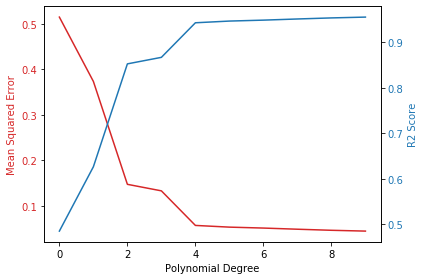

In [226]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ridge, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ridge, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

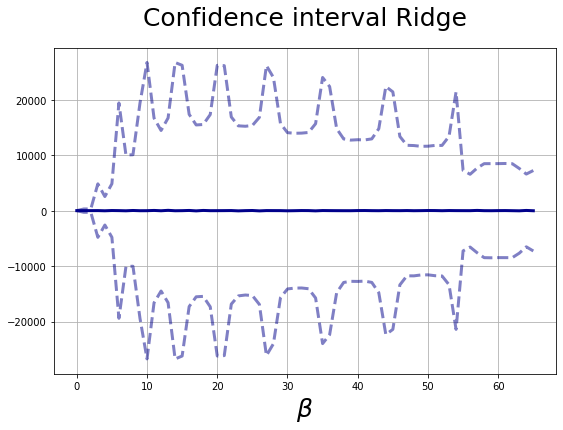

In [30]:


power = 10

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ridge['poly'+str(power)] - confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ridge['poly'+str(power)] + confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5, linewidth=3)
ax.plot(beta_ridge['poly'+str(power)], c='darkblue',linewidth=3)
plt.title('Confidence interval Ridge', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()



[-8.86484929e-01 -3.20000925e-01  8.45521197e-01  7.37966131e+00
 -2.62755623e+01  1.98785593e+01  1.77541313e+00 -2.86146575e+01
  2.83774163e+01 -1.56110974e+01 -1.00899688e+01  3.54369228e+01
 -2.23027730e+01  5.56002672e+01 -1.98747401e+01 -4.66858188e+00
  3.35471472e+01 -4.31374022e+01  3.59034253e+01 -7.78625166e+00
 -5.61528552e+00  2.38601963e+00  1.40912894e+01 -4.15067493e+01
 -2.35731192e-03  2.35375451e+01 -4.43964083e+01  9.29840333e+00
  4.41248431e+00 -2.37595820e-01 -2.96865933e+01 -9.91921287e+00
  1.55011076e+01  6.89934819e+00 -3.94311417e+01  1.69136948e+01
  2.60279366e+00 -5.74483428e+00 -1.03318129e+01 -1.36644491e+01
  1.19804285e+01  1.99181052e+01 -2.16370448e+00 -1.28452615e+01
  1.45451887e+01 -2.67681647e-01 -5.93445466e+00  1.41754538e+01
 -1.27035266e+01 -4.01669469e-02  2.13204276e+01  1.34689675e+01
 -1.26850273e+01  1.58985059e+01  1.86658964e+00 -2.39120345e+00
 -5.75497146e+00  3.97588280e+01 -5.90932659e+00 -1.38928026e+01
  3.42050728e+00  1.21768

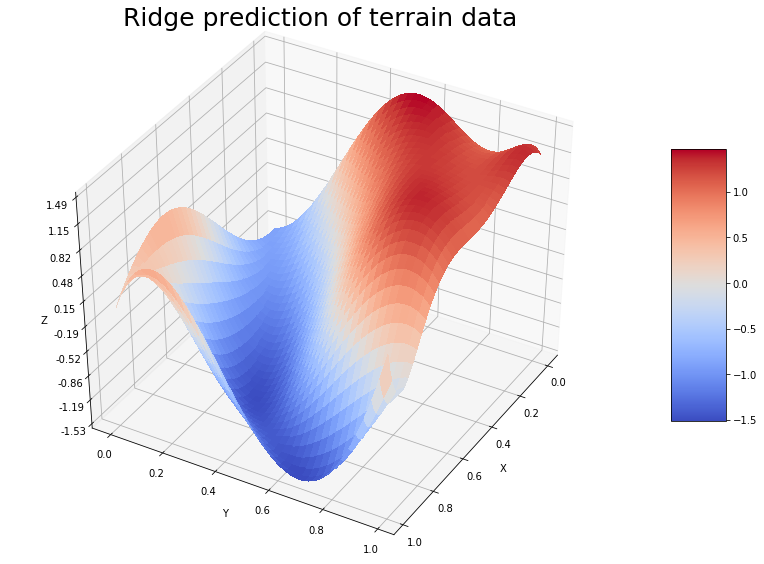

In [229]:
#plotting the predicted surface for polynomial degree 10
print(beta_ridge['poly10'])
prediction_ridge10 = pred_ridge['poly10'].reshape((nx,ny))

########################### Surface Plot #############################
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d') 
surf        = ax.plot_surface(x_mesh, y_mesh, prediction_ridge10, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
#ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=40., azim=30)
plt.title('Ridge prediction of terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [230]:
maxpower = 10
lambdas=np.logspace(-4,2,7)

r2_out_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_ridge   = np.zeros([maxpower,lambdas.shape[0]])
tmp=0
for i in range(maxpower):
    for j in range(lambdas.shape[0]):
        
        design_matrix   = fx.DesignDesign(x,y,i+1)
        r2_out_ridge[i,j], mse_out_ridge[i,j], r2_in_ridge[i,j], mse_in_ridge[i,j] \
                        = fx.k_fold_cv(5, np.ravel(terrain), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True)
        tmp+=1
        print((tmp)*100/(maxpower*lambdas.shape[0]), '% completed')




1.4285714285714286 % completed
2.857142857142857 % completed
4.285714285714286 % completed
5.714285714285714 % completed
7.142857142857143 % completed
8.571428571428571 % completed
10.0 % completed
11.428571428571429 % completed
12.857142857142858 % completed
14.285714285714286 % completed
15.714285714285714 % completed
17.142857142857142 % completed
18.571428571428573 % completed
20.0 % completed
21.428571428571427 % completed
22.857142857142858 % completed
24.285714285714285 % completed
25.714285714285715 % completed
27.142857142857142 % completed
28.571428571428573 % completed
30.0 % completed
31.428571428571427 % completed
32.857142857142854 % completed
34.285714285714285 % completed
35.714285714285715 % completed
37.142857142857146 % completed
38.57142857142857 % completed
40.0 % completed
41.42857142857143 % completed
42.857142857142854 % completed
44.285714285714285 % completed
45.714285714285715 % completed
47.142857142857146 % completed
48.57142857142857 % completed
50.0 % com

mse_ols 0.03902457042254922
r2_ols 0.9609199827826794


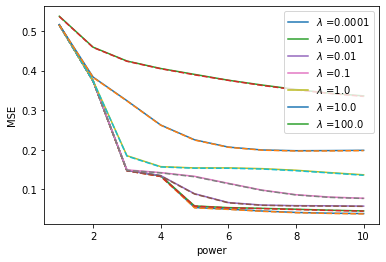

In [232]:
print('mse_ols', mse_out_ridge[9,0] )
print('r2_ols', r2_out_ridge[9,0] )


for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),mse_out_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),mse_in_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power')
plt.ylabel('MSE')
plt.show()


In [189]:
N = 100
degrees = np.arange(0,10)
lambdas=np.logspace(-6,2,7)

err=np.empty([len(degrees),len(lambdas)])
bi=np.empty([len(degrees),len(lambdas)])
vari=np.empty([len(degrees),len(lambdas)])

for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    for lamb in range(len(lambdas)):
        error,bias,variance = fx.N_bootstraps(np.ravel(terrain),model,fx.RidgeRegression,N, _lambda=lambdas[lamb])
        err[degree,lamb]=error
        bi[degree,lamb]=bias
        vari[degree,lamb]=variance


0
1
2
3
4
5
6
7
8
9


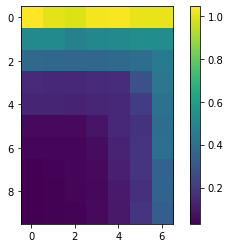

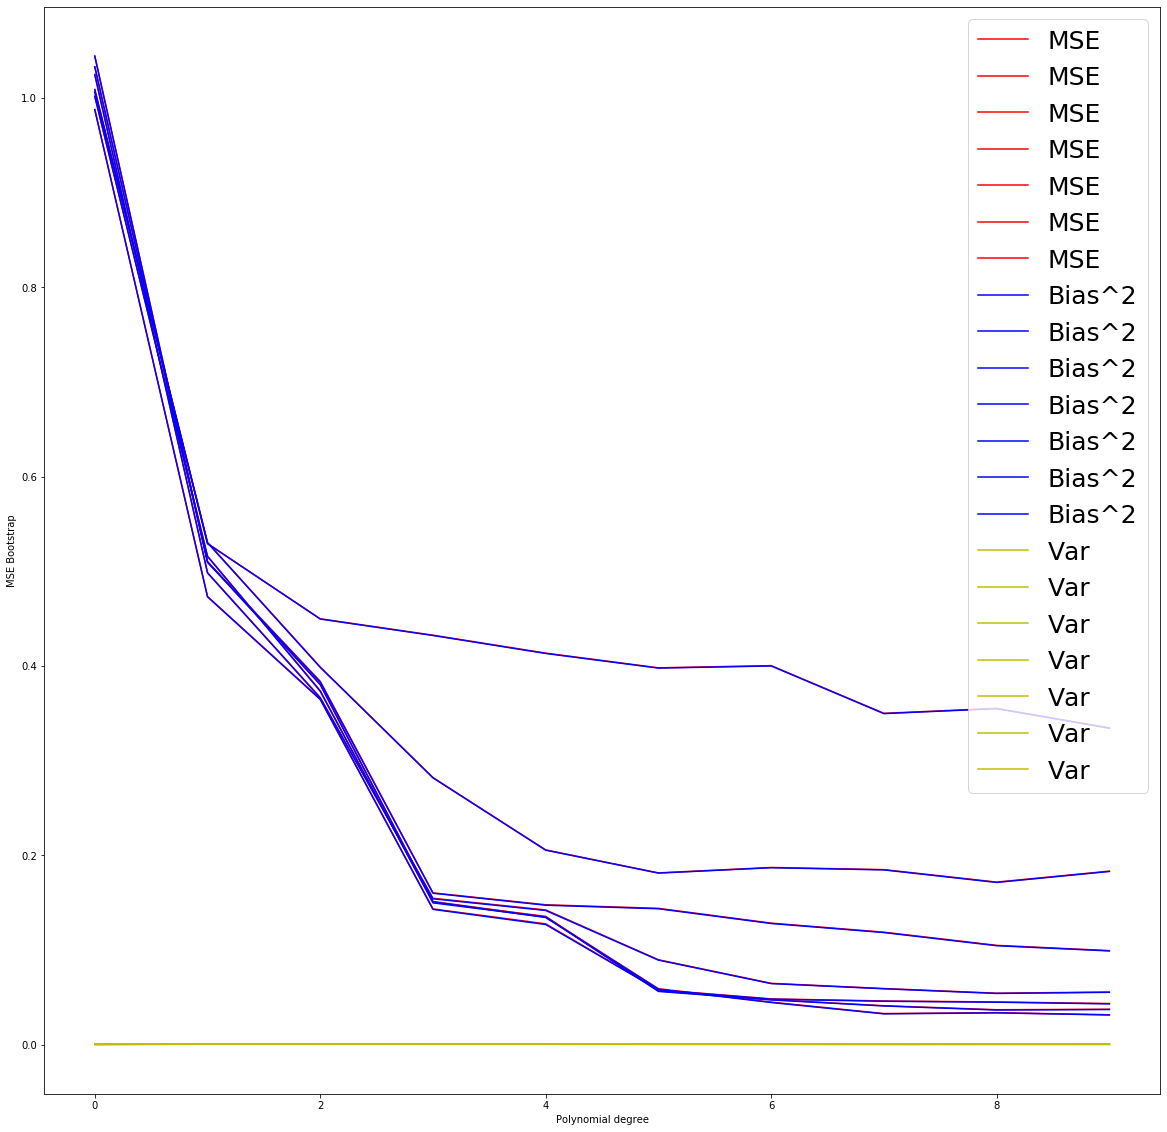

In [190]:
plt.imshow(bi)
plt.colorbar()
plt.show()


max_pd=50
plt.figure(figsize=(20,20))
plt.plot(degrees[:max_pd],err[:max_pd],'red',label='MSE')
plt.plot(degrees[:max_pd],np.asarray(bi[:max_pd]),'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
#for i in range(len(err)):
#    summ[i]=vari[i]+bi[i]
#plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend(fontsize=25)
plt.show()

# LASSO

MSE
0.07066246072703769
R2
0.9293375392729624
predicted intercept
-0.7629953895133187
actual intercept
0.2713428091144355


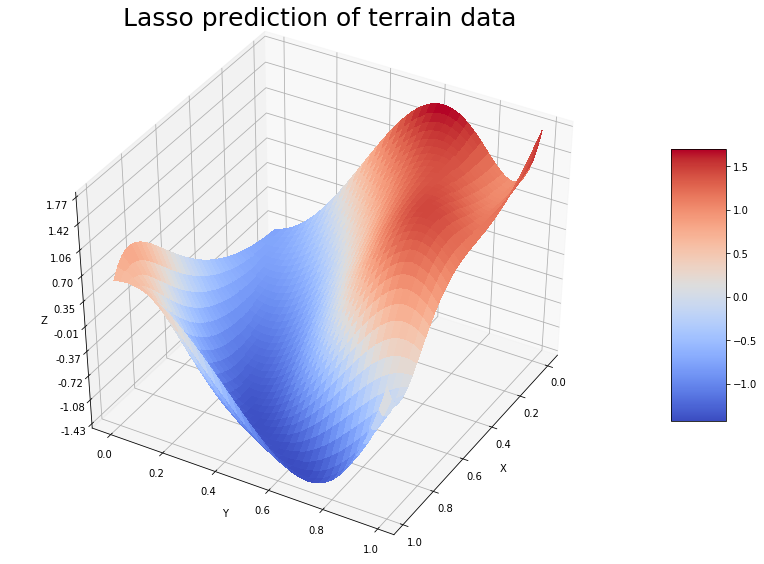

In [279]:
# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[nx,ny]
x_lasso = np.ravel(x)
y_lasso = np.ravel(y)
z_lasso = np.ravel(np.ravel(terrain))

lasso_multi = np.c_[x_lasso, y_lasso]

# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
#poly2 = PolynomialFeatures(degree=5)

# Transformerer variabelmatrisen 
#Lasso_sklearn = poly2.fit_transform(lasso_multi)

Lasso_sklearn=fx.DesignDesign(x,y,10)

# Beregner Lasso modell 
lasso = linear_model.Lasso(alpha=1e-04, max_iter=10e5)
fit_lasso = lasso.fit(Lasso_sklearn[:,1:], z_lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn[:,1:])


# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(shape) # for å få den i samme dimensjon som x og y. 


print("MSE")
print(fx.MSE(np.ravel(terrain),np.ravel(predict_mesh_Lasso)))
print("R2")
print(fx.R2Score(np.ravel(terrain),np.ravel(predict_mesh_Lasso)))
        
print("predicted intercept")
print(fit_lasso.intercept_)

print("actual intercept")
print(np.ravel(terrain)[0])

########################### Surface Plot #############################
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d') 
surf        = ax.plot_surface(x_mesh, y_mesh, predict_mesh_Lasso, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
#ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=40., azim=30)
plt.title('Lasso prediction of terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()






In [320]:


# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[nx,ny]
x_lasso = np.ravel(x_mesh)
y_lasso = np.ravel(y_mesh)
z_lasso = np.ravel(terrain)



lasso_multi = np.c_[x_lasso, y_lasso]
powers=np.arange(1,11)
lambdas=np.logspace(-4,2,7)
print(len(powers)*len(lambdas))
mse_lasso   = np.empty([len(powers),len(lambdas)])
r2_lasso    = np.empty([len(powers),len(lambdas)])
non_zero    = np.zeros([len(powers),len(lambdas)])
total       = np.zeros([len(powers),len(lambdas)])
for power in powers:
    #poly2 = PolynomialFeatures(degree=power)
    #Lasso_sklearn = poly2.fit_transform(lasso_multi)
    Lasso_sklearn=fx.DesignDesign(x,y,power)
    print(power)
    for lamb in range(len(lambdas)): 
        lasso = linear_model.Lasso(alpha=lambdas[lamb], fit_intercept=True, max_iter=10e5)
        fit_lasso = lasso.fit(Lasso_sklearn[:,1:], z_lasso) 
        predictLasso = lasso.predict(Lasso_sklearn[:,1:])
        
        
        non_zero[power-1,lamb] = np.count_nonzero(fit_lasso.coef_)
        total[power-1,lamb] = len(fit_lasso.coef_)
        mse_lasso[power-1,lamb] = fx.MSE(z_lasso,predictLasso)
        r2_lasso[power-1,lamb] = fx.R2Score(z_lasso,predictLasso)
        


70
1
2
3
4
5
6
7
8
9
10


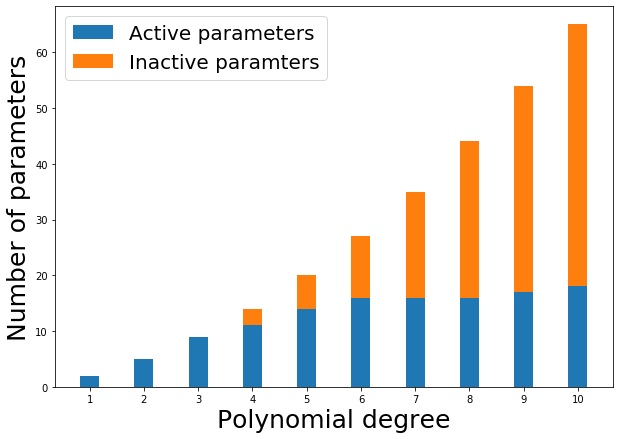

In [326]:
fig         = plt.figure(figsize=(10,7)) 
width = 0.35       
p1 = plt.bar(powers, non_zero[:,0], width)
p2 = plt.bar(powers, total[:,0]-non_zero[:,0], width, bottom=non_zero[:,0])
plt.xticks(powers)
plt.xlabel('Polynomial degree', fontsize=25)
plt.ylabel('Number of parameters', fontsize=25)
plt.legend((p1[0], p2[0]), ('Active parameters', 'Inactive paramters'), fontsize=20)

plt.show()

In [193]:
import numpy as np
from sklearn.model_selection import KFold
k=5
X=np.c_[x_lasso, y_lasso]
kf = KFold(n_splits=k,shuffle=True,random_state=5)

maxpower = 10
lambdas=np.logspace(-4,2,7)

mse_lasso_in=np.empty([maxpower, len(lambdas)])
mse_lasso_out=np.empty([maxpower, len(lambdas)])


r2_lasso_in=np.empty([maxpower, len(lambdas)])
r2_lasso_out=np.empty([maxpower, len(lambdas)])




for power in range(maxpower):
    print(power+1)
    
    for lamb in range(len(lambdas)): 
        errin=0
        errout=0
        r2in=0
        r2out=0
        for train, test in kf.split(X):
            x_train = np.ravel(x_mesh)[train]
            y_train = np.ravel(y_mesh)[train]
            x_test = np.ravel(x_mesh)[test]
            y_test = np.ravel(y_mesh)[test]
            
            z_train = np.ravel(terrain)[train] 
            z_test = np.ravel(terrain)[test]
            
            Lasso_train=fx.DesignDesign(x_train,y_train,power+1, ravel=True)
            Lasso_test=fx.DesignDesign(x_test,y_test,power+1, ravel=True)
            
            
            lasso = linear_model.Lasso(alpha=lambdas[lamb], max_iter=10e5)
            fit_lasso = lasso.fit(Lasso_train[:,1:], z_train)
            
            predictLasso = lasso.predict(Lasso_test[:,1:])
            predictLasso_train = lasso.predict(Lasso_train[:,1:])
            
            errin += fx.MSE(z_train, predictLasso_train)
            errout += fx.MSE(z_test, predictLasso)
            r2in += fx.R2Score(z_train,predictLasso_train)
            r2out += fx.R2Score(z_test, predictLasso)
            
        mse_lasso_in[power,lamb] = errin/k
        mse_lasso_out[power,lamb] = errout/k
        r2_lasso_in[power,lamb] = r2in/k
        r2_lasso_out[power,lamb] = r2out/k
        
        
        

1
2
3
4
5
6
7
8
9
10


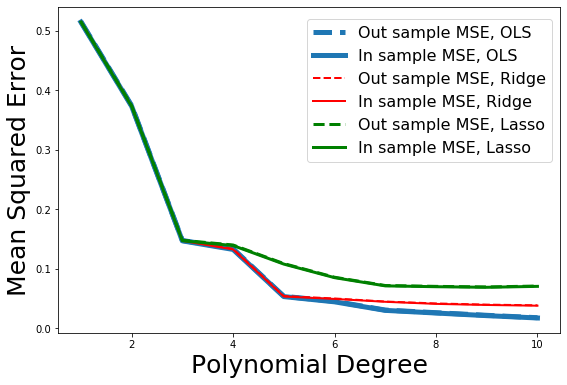

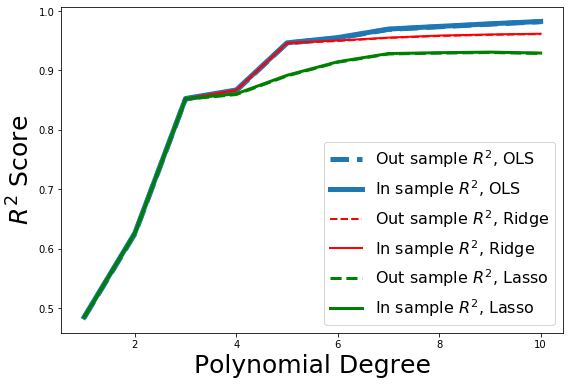

In [194]:
fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25)
p1=ax1.plot(range(1,maxpower+1), mse_out_ols,linestyle='--', label='Out sample MSE, OLS',linewidth=5)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_in_ols, color=col, label='In sample MSE, OLS',linewidth=5)
p1=ax1.plot(range(1,maxpower+1), mse_out_ridge[:,0], color='red',linestyle='--', label='Out sample MSE, Ridge',linewidth=2)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_in_ridge[:,0], color=col, label='In sample MSE, Ridge',linewidth=2)
p1=ax1.plot(range(1,maxpower+1), mse_lasso_out[:,0], color='green',linestyle='--', label='Out sample MSE, Lasso',linewidth=3)
col=p1[0].get_color()
ax1.plot(range(1,maxpower+1), mse_lasso_in[:,0], color=col, label='In sample MSE, Lasso',linewidth=3)

ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.5),fontsize=16)
ax1.tick_params(axis='y')
#ax2 = ax1.twinx()  #instantiate a second axes that shares the same x-axis

fig, ax2 = plt.subplots(figsize=(9,6))
ax2.set_xlabel('Polynomial Degree',fontsize=25)
p1=ax2.plot(range(1,maxpower+1), r2_out_ols,linestyle='--', label='Out sample $R^2$, OLS',linewidth=5)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_in_ols, color=col, label='In sample $R^2$, OLS',linewidth=5)
p1=ax2.plot(range(1,maxpower+1), r2_out_ridge[:,0], color='red',linestyle='--', label='Out sample $R^2$, Ridge',linewidth=2)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_in_ridge[:,0], color=col, label='In sample $R^2$, Ridge',linewidth=2)
p1=ax2.plot(range(1,maxpower+1), r2_lasso_out[:,0], color='green',linestyle='--', label='Out sample $R^2$, Lasso',linewidth=3)
col=p1[0].get_color()
ax2.plot(range(1,maxpower+1), r2_lasso_in[:,0], color=col, label='In sample $R^2$, Lasso',linewidth=3)


ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.0),fontsize=16)
ax2.tick_params(axis='y')
ax2.set_ylabel('$R^2$ Score',fontsize=25)  # we already handled the x-label with ax1
plt.show()

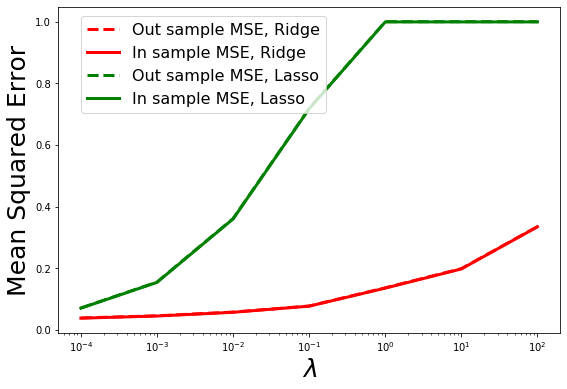

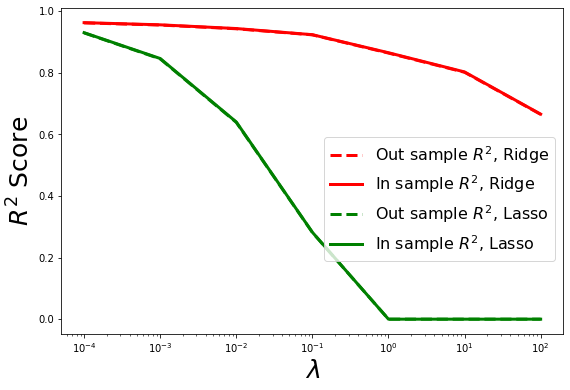

In [195]:

fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('$\lambda$',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25)
#p1=ax1.plot(lambdas, mse_out_ols,linestyle='--', label='Out sample MSE, OLS')
#col=p1[0].get_color()
#ax1.plot(lambdas, mse_in_ols, color=col, label='In sample MSE, OLS')
p1=ax1.plot(lambdas, mse_out_ridge[9,:], color='red',linestyle='--', label='Out sample MSE, Ridge',linewidth=3)
col=p1[0].get_color()
ax1.plot(lambdas, mse_in_ridge[9,:], color=col, label='In sample MSE, Ridge',linewidth=3)
p1=ax1.plot(lambdas, mse_lasso_out[9,:], color='green',linestyle='--', label='Out sample MSE, Lasso',linewidth=3)
col=p1[0].get_color()
ax1.plot(lambdas, mse_lasso_in[9,:], color=col, label='In sample MSE, Lasso',linewidth=3)
plt.xscale('log')
ax1.legend(loc='lower right', bbox_to_anchor=(0.55, 0.65),fontsize=16)
ax1.tick_params(axis='y')
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

fig, ax2 = plt.subplots(figsize=(9,6))
ax2.set_xlabel('$\lambda$',fontsize=25)
#p1=ax2.plot(lambdas, r2_out_ols,linestyle='--', label='Out sample $R^2$, OLS')
#col=p1[0].get_color()
#ax2.plot(lambdas, r2_in_ols, color=col, label='In sample $R^2$, OLS')
p1=ax2.plot(lambdas, r2_out_ridge[9,:], color='red',linestyle='--', label='Out sample $R^2$, Ridge',linewidth=3)
col=p1[0].get_color()
ax2.plot(lambdas, r2_in_ridge[9,:], color=col, label='In sample $R^2$, Ridge',linewidth=3)
p1=ax2.plot(lambdas, r2_lasso_out[9,:], color='green',linestyle='--', label='Out sample $R^2$, Lasso',linewidth=3)
col=p1[0].get_color()
plt.xscale('log')
ax2.plot(lambdas, r2_lasso_in[9,:], color=col, label='In sample $R^2$, Lasso',linewidth=3)


ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax2.tick_params(axis='y')
ax2.set_ylabel('$R^2$ Score',fontsize=25)  # we already handled the x-label with ax1
plt.show()